## Unemployment Analysis

### Import the libraries and load the dataset 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the dataset and show the first 5 rows
unemployment_data = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')

unemployment_data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


### Exploratory Data Analysis

In [4]:
# Getting the shape of our dataset, total rows and total columns
unemployment_data.shape

(267, 9)

In [5]:
# Let's check the columns and their data types
unemployment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [6]:
# Statistical analysis
unemployment_data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


#### Check for inconsistencies and fix them
We will change column names into lower case characters, there are also white spaces before some column names, change date format from object to datatime, check for duplicates regions and missing values

In [7]:
# Turn column names into lower case
unemployment_data.columns = unemployment_data.columns.str.lower()

unemployment_data.head()

,region,date,frequency,estimated unemployment rate (%),estimated employed,estimated labour participation rate (%),region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [8]:
# There are white spaces at the beginning of some columns, let's remove them.

unemployment_data.columns = unemployment_data.columns.str.strip()

unemployment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   region                                   267 non-null    object 
 1   date                                     267 non-null    object 
 2   frequency                                267 non-null    object 
 3   estimated unemployment rate (%)          267 non-null    float64
 4   estimated employed                       267 non-null    int64  
 5   estimated labour participation rate (%)  267 non-null    float64
 6   region.1                                 267 non-null    object 
 7   longitude                                267 non-null    float64
 8   latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [9]:
# Rename region.1 column
unemployment_data.rename(columns={'region.1': 'area'}, inplace=True)
unemployment_data.columns



Index(['region', 'date', 'frequency', 'estimated unemployment rate (%)',
       'estimated employed', 'estimated labour participation rate (%)', 'area',
       'longitude', 'latitude'],
      dtype='object')

In [10]:

# Checking for missing values
unemployment_data.isnull().sum()



region                                     0
date                                       0
frequency                                  0
estimated unemployment rate (%)            0
estimated employed                         0
estimated labour participation rate (%)    0
area                                       0
longitude                                  0
latitude                                   0
dtype: int64

In [11]:
# Check for duplicate values
# unemployment_data.duplicated().value_counts()
print('Total duplicates: ')
unemployment_data.duplicated().sum()


Total duplicates: 


0

In [12]:
# drop longitude and latitude columns
my_df = unemployment_data.drop(['longitude', 'latitude', 'frequency'], axis=1)
my_df.head()

,region,date,estimated unemployment rate (%),estimated employed,estimated labour participation rate (%),area
0,Andhra Pradesh,31-01-2020,5.48,16635535,41.02,South
1,Andhra Pradesh,29-02-2020,5.83,16545652,40.90,South
2,Andhra Pradesh,31-03-2020,5.79,15881197,39.18,South
3,Andhra Pradesh,30-04-2020,20.51,11336911,33.10,South
4,Andhra Pradesh,31-05-2020,17.43,12988845,36.46,South


In [13]:
# The date column was showing as object, let's change this to datetime
my_df['date'] = pd.to_datetime(my_df['date'], dayfirst=True)

#  Extract the month component
my_df['month'] = my_df['date'].dt.month_name()

# Extract the year component
my_df['year'] = my_df['date'].dt.year

In [14]:
my_df.head()

,region,date,estimated unemployment rate (%),estimated employed,estimated labour participation rate (%),area,month,year
0,Andhra Pradesh,2020-01-31,5.48,16635535,41.02,South,January,2020
1,Andhra Pradesh,2020-02-29,5.83,16545652,40.90,South,February,2020
2,Andhra Pradesh,2020-03-31,5.79,15881197,39.18,South,March,2020
3,Andhra Pradesh,2020-04-30,20.51,11336911,33.10,South,April,2020
4,Andhra Pradesh,2020-05-31,17.43,12988845,36.46,South,May,2020


### Visualisation and Statistical Analysis

In [15]:
# Summary statistics
my_df.describe()



,date,estimated unemployment rate (%),estimated employed,estimated labour participation rate (%),year
count,267,267.000000,2.670000e+02,267.000000,267.0
mean,2020-06-16 09:15:30.337078528,12.236929,1.396211e+07,41.681573,2020.0
min,2020-01-31 00:00:00,0.500000,1.175420e+05,16.770000,2020.0
25%,2020-03-31 00:00:00,4.845000,2.838930e+06,37.265000,2020.0
50%,2020-06-30 00:00:00,9.650000,9.732417e+06,40.390000,2020.0
75%,2020-08-31 00:00:00,16.755000,2.187869e+07,44.055000,2020.0
max,2020-10-31 00:00:00,75.850000,5.943376e+07,69.690000,2020.0
std,NaN,10.803283,1.336632e+07,7.845419,0.0


##### Unemployment rate over time

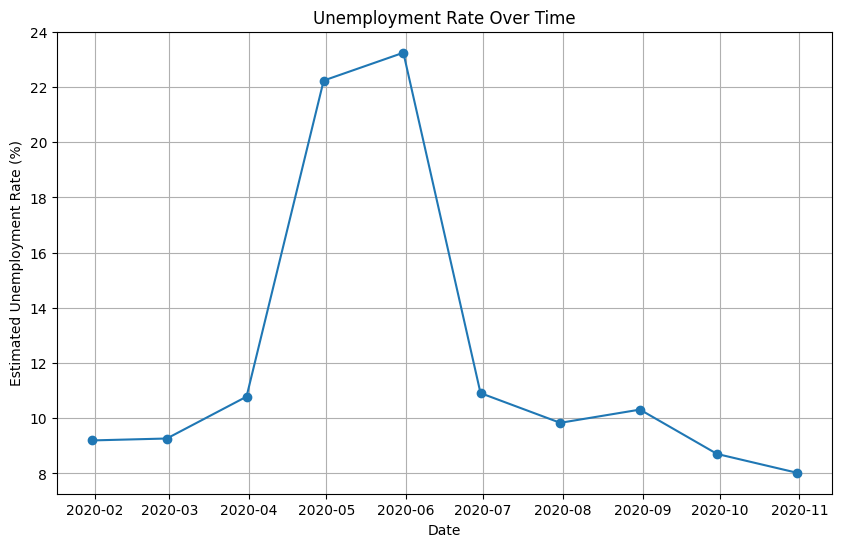

In [16]:
import plotly.express as px

#  Mean unemployment rate over time
mean_unemployment_over_time = my_df.groupby('date')['estimated unemployment rate (%)'].mean()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(mean_unemployment_over_time.index, mean_unemployment_over_time.values, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time')
plt.grid(True)

plt.show()

### Observations
Unemployment rates started to climb from march 2020 and continue to rise rapidly from April 2020 until July 2020. This period coincide 
with the rise of the corona virus pandemic when contries were implementing lockdown measures worldwide to contain the virus and minimize 
contaminations and fatalities. 

##### Unemployment rate by region

In [25]:
# Bar Plot of Average Estimated Unemployment Rate by region
mean_unemployment_by_region = my_df.groupby('region')['estimated unemployment rate (%)'].mean().reset_index()
fig = px.bar(
    mean_unemployment_by_region,
    x='region',
    y='estimated unemployment rate (%)',
    color='region',
    title='Average Unemployment Rate by Region'
)
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

##### Unemployment rate by area

In [26]:
# Bar Plot of Average Estimated Unemployment Rate by Area
mean_unemployment_by_area = my_df.groupby('area')['estimated unemployment rate (%)'].mean().reset_index()
fig = px.bar(
    mean_unemployment_by_area,
    x='area',
    y='estimated unemployment rate (%)',
    color='area',
    title='Average Unemployment Rate by Area'
)
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

##### Unemployment rate by Area and Region

In [60]:
mean_unemployment_area_region = my_df.groupby(['area', 'region'])['estimated unemployment rate (%)'].mean().reset_index()

# Create a treemap with mean unemployment rates
fig = px.treemap(
    mean_unemployment_area_region,
    path=[px.Constant('India'), 'area', 'region'],
    values='estimated unemployment rate (%)',
    color='estimated unemployment rate (%)',
    hover_data=['area', 'region']
)

# Show the plot
fig.show()

##### Estimated employed by area

In [57]:
# Bar Plot of Average Estimated Employed by Area
mean_employed_area = my_df.groupby('area')['estimated employed'].mean().reset_index()
fig = px.bar(
    mean_employed_area,
    x='area',
    y='estimated employed',
    color='area',
    title='Average Employed by Area'
)
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

##### Estimated Employed Rate by Region

In [62]:
# Bar Plot of Average Estimated employed Rate by Region
mean_employed_by_region = my_df.groupby('region')['estimated employed'].mean().reset_index()
fig = px.bar(
    mean_employed_by_region,
    x='region',
    y='estimated employed',
    color='region',
    title='Average employed by Region'
)
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

##### Estimated Employed people per month and region

In [63]:
# Bar Plot of Estimated Employed people per month and region
fig = px.bar(my_df, x = 'month', y = 'estimated employed', color = 'region', title = 'Estimated Employed People')
fig.show()

##### Labour Participation Rate by Area

In [58]:
# Bar Plot of estimated Labour Participation Rate by Area
mean_labour_area = my_df.groupby('area')['estimated labour participation rate (%)'].mean().reset_index()
fig = px.bar(
    mean_labour_area,
    x='area',
    y='estimated labour participation rate (%)',
    color='area',
    title='Estimated Labour Participation Rate'
)
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

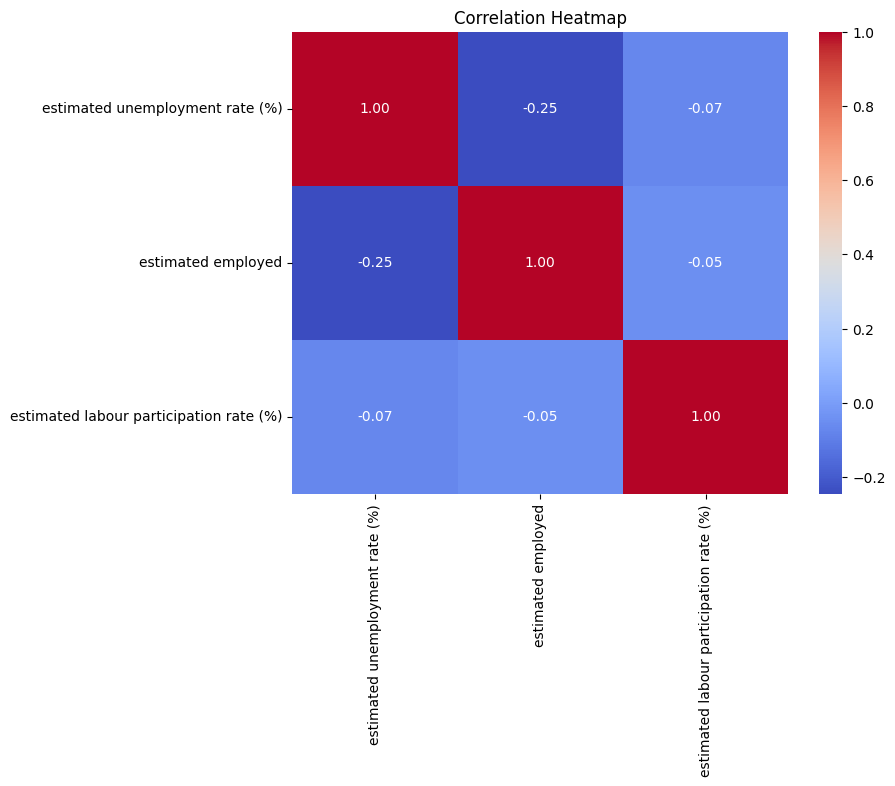

In [52]:
# Calculate correlation matrix
correlation = my_df[['estimated unemployment rate (%)', 'estimated employed', 'estimated labour participation rate (%)']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()